In [44]:
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS

# Datetime
from datetime import datetime
# text preprocessing
import spacy
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
    
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
import contractions
import unicodedata
tokenizer = ToktokTokenizer()
from sklearn.feature_extraction.text import CountVectorizer

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /Users/vikpandey/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [45]:
product_reviews = pd.read_csv('data/clean_review.csv')

In [46]:
product_reviews.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_username,user_sentiment,review_text,clean_text
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,True,True,5,joshua,Positive,Just Awesome i love this album. it's very good...,awesome love album good hip hop side current p...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,False,False,5,dorothy w,Positive,Good Good flavor. This review was collected as...,good good flavor review collect part promotion
2,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,rebecca,Negative,Disappointed I read through the reviews on her...,disappoint read review look buy one couple lub...
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,walker557,Negative,Irritation My husband bought this gel for us. ...,irritation husband buy gel us gel cause irrita...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-20T00:00:00.000Z,False,False,1,samantha,Negative,Not worth it My boyfriend and I bought this to...,not worth boyfriend buy spice things bedroom h...


In [47]:
product_reviews.shape

(29742, 13)

In [48]:
product_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29742 entries, 0 to 29741
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   29742 non-null  object
 1   brand                29742 non-null  object
 2   categories           29742 non-null  object
 3   manufacturer         29742 non-null  object
 4   name                 29742 non-null  object
 5   reviews_date         29742 non-null  object
 6   reviews_didPurchase  29742 non-null  bool  
 7   reviews_doRecommend  29742 non-null  bool  
 8   reviews_rating       29742 non-null  int64 
 9   reviews_username     29742 non-null  object
 10  user_sentiment       29742 non-null  object
 11  review_text          29742 non-null  object
 12  clean_text           29742 non-null  object
dtypes: bool(2), int64(1), object(10)
memory usage: 2.6+ MB


In [49]:
import pandas_profiling

In [50]:
pandas_profiling.ProfileReport(product_reviews)

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Exploratory Data Analysis

Text(0, 0.5, 'Number of Reviews')

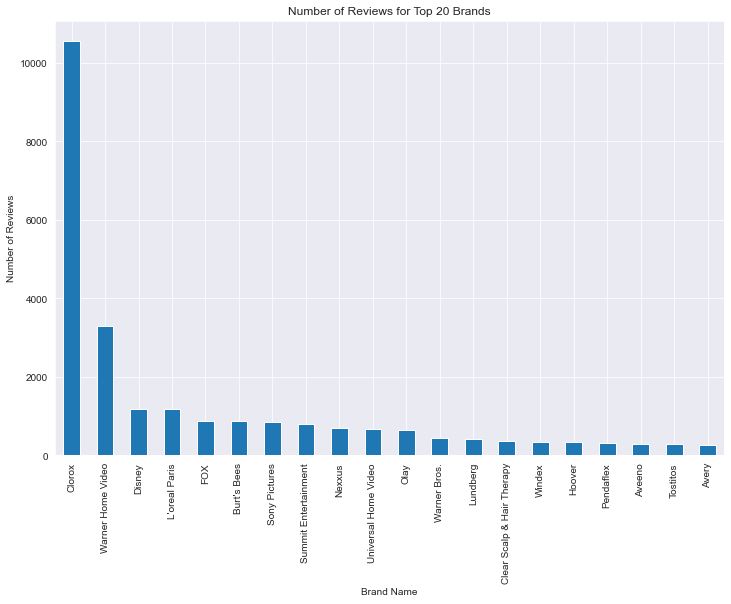

In [51]:
##########################################
## PLOT NUMBER OF REVIEWS FOR TOP 20 BRANDS  
##########################################

brands = product_reviews["brand"].value_counts()
plt.figure(figsize=(12,8))
brands[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 20 Brands")
plt.xlabel('Brand Name')
plt.ylabel('Number of Reviews')

Text(0, 0.5, 'Number of Reviews')

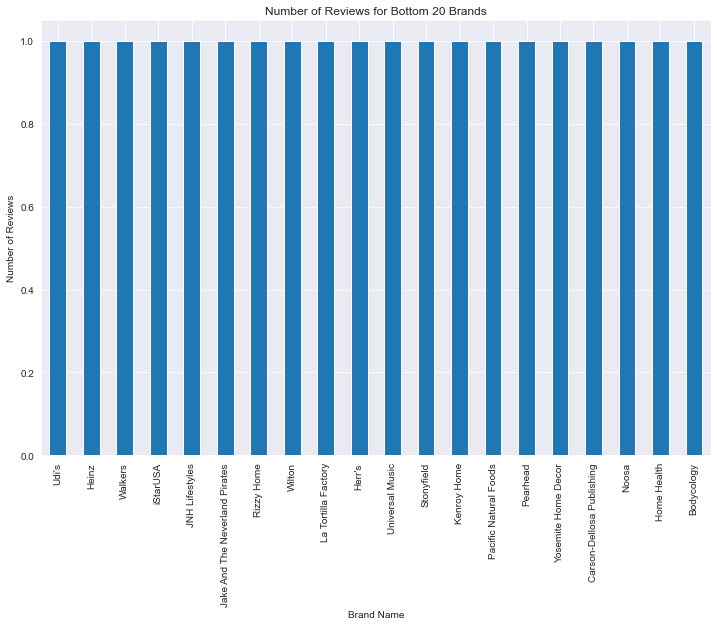

In [52]:
##########################################
## PLOT NUMBER OF REVIEWS FOR BOTTOM 20 BRANDS  
##########################################

brands = product_reviews["brand"].value_counts()
# brands.count()
plt.figure(figsize=(12,8))
brands[-20:].plot(kind='bar')
plt.title("Number of Reviews for Bottom 20 Brands")
plt.xlabel('Brand Name')
plt.ylabel('Number of Reviews')

Text(0, 0.5, 'Number of Reviews')

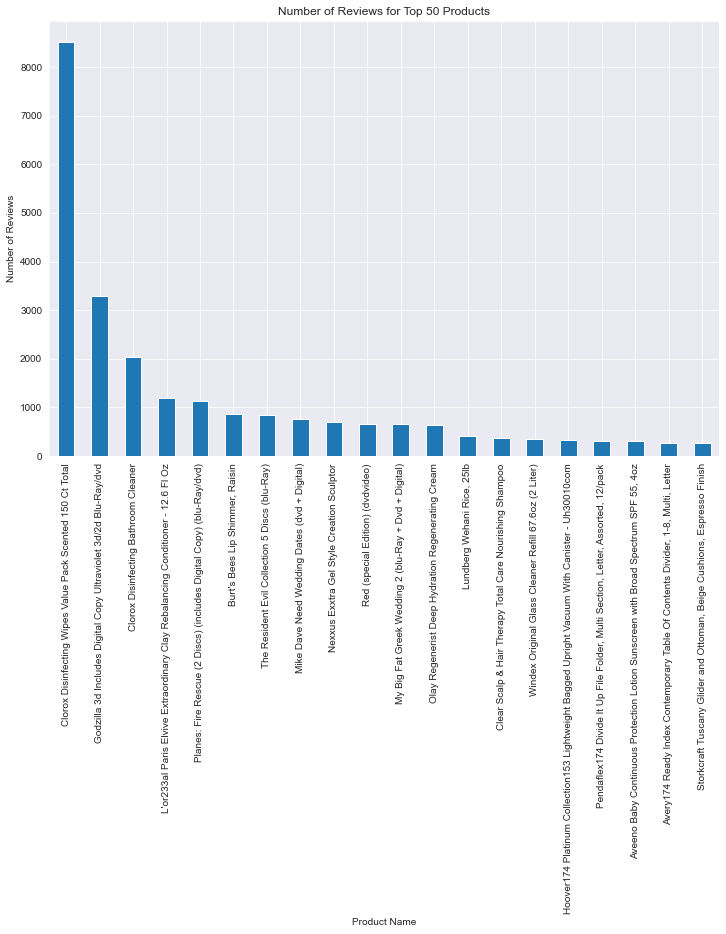

In [53]:
##########################################
## PLOT NUMBER OF REVIEWS FOR TOP 20 PRODUCTS  
##########################################

products = product_reviews["name"].value_counts()
plt.figure(figsize=(12,8))
products[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 50 Products")
plt.xlabel('Product Name')
plt.ylabel('Number of Reviews')

In [54]:
j_5 = product_reviews[(product_reviews['id']=="AVpf3VOfilAPnD_xjpun")]
j_5

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_username,user_sentiment,review_text,clean_text
6396,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2012-01-26T13:31:39.000Z,True,True,1,barsea,Positive,"Fresh Smell This is an outstanding product, it...",fresh smell outstanding product not clean surf...
6397,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2013-08-15T15:47:17.000Z,True,True,1,sofia50,Positive,Smell I have been an avid user of Clorox Wipes...,smell avid user clorox wipe many years love so...
6398,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2013-03-29T07:41:03.000Z,True,True,1,renee65,Positive,Who Changed The Scent?? I have used Clorox Wip...,change scent use clorox wipe years not live wi...
6399,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2013-03-26T00:03:29.000Z,True,True,1,angi677,Positive,New Product Stinks I use Clorox wipes fanatica...,new product stink use clorox wipe fanatically ...
6400,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2015-01-01T00:00:00.000Z,False,True,1,brandy33,Positive,"Germ free Being a mom of three, disinfecting t...",germ free mom three disinfect home always big ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14908,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2014-12-18T00:00:00.000Z,False,True,5,jcyrachel69,Positive,i love this product Thia is a amazing product ...,love product thia amaze product fight germs sm...
14909,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2015-02-08T00:00:00.000Z,False,True,5,tiffmillion,Positive,Clorox Wipes I love clorox wipes. They are ver...,clorox wipe love clorox wipe convenient easy u...
14910,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2015-02-08T00:00:00.000Z,False,True,5,karingbear,Positive,"Love the Wipes Easy to clean with just a wipe,...",love wipe easy clean wipe wipe convienent revi...
14911,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2015-02-08T00:00:00.000Z,False,True,5,rocky200718,Positive,"Love I love their wipes they are easy to use, ...",love love wipe easy use quick effective review...


In [55]:
apple_fplot = j_5.groupby(['reviews_date'])['reviews_rating'].mean()
apple_fplot

reviews_date
2011-10-15T00:00:00.000Z    5.0
2011-12-13T00:00:00.000Z    5.0
2011-12-19T04:22:38.000Z    5.0
2011-12-27T00:00:00.000Z    5.0
2012-01-14T00:00:00.000Z    4.0
                           ... 
2017-08-13T23:46:06.000Z    5.0
2017-09-01T17:29:38.000Z    3.0
2017-11-06T02:30:08.000Z    5.0
2017-11-22T15:09:35.000Z    5.0
2017-12-18T21:51:08.000Z    5.0
Name: reviews_rating, Length: 2489, dtype: float64

In [56]:
from nltk.tokenize import RegexpTokenizer
def RegExpTokenizer(Sent):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(Sent)

ListWords = []
for m in j_5['clean_text']:
    n = RegExpTokenizer(str(m))
    ListWords.append(n)
print(ListWords[10])


['unhappy', 'product', 'change', 'use', 'clorox', 'wipe', 'number', 'years', 'excite', 'try', 'new', 'products', 'really', 'like', 'new', 'dispense', 'top', 'new', 'scent', 'unpleasant', 'wouldnt', 'call', 'lemon', 'also', 'didnt', 'think', 'quality', 'clean', 'good', 'old', 'product', 'new', 'wipe', 'textured', 'one', 'side', 'soft', 'felt', 'like', 'scrub', 'much', 'harder', 'surface', 'didnt', 'get', 'clean', 'not', 'buy', 'product']


In [57]:
#All Words
from nltk import FreqDist
def Bag_Of_Words(ListWords):
    all_words = []
    for m in ListWords:
        for w in m:
            all_words.append(w.lower())
    all_words1 = FreqDist(all_words)
    return all_words1


Total Words :: 4367


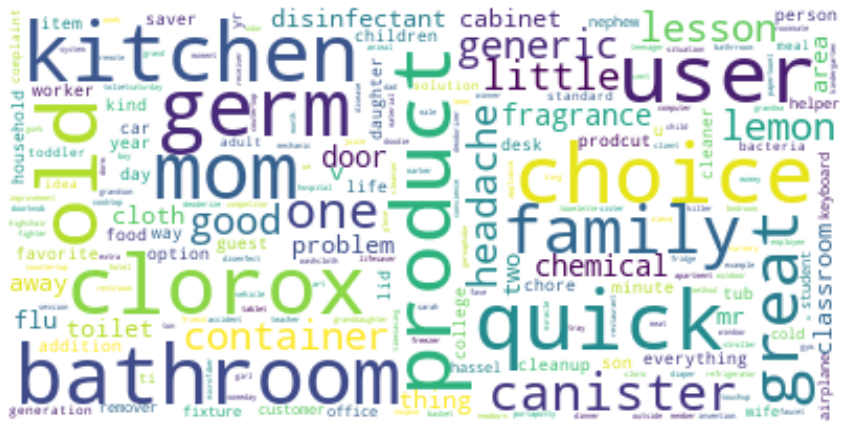

In [58]:
import matplotlib as mpl
from wordcloud import WordCloud
all_words4 = Bag_Of_Words(ListWords)
ax = plt.figure(figsize=(15,10))
# Generate a word cloud image
wordcloud = WordCloud(background_color='white',max_font_size=40).generate(' '.join(all_words4.keys()))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
print("Total Words ::",len(all_words4))

<AxesSubplot:>

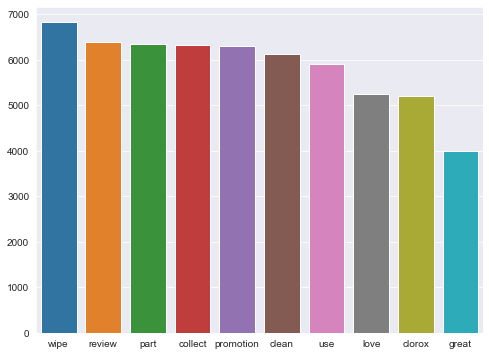

In [59]:
plt.figure(figsize = (8,6))
import seaborn as sns
from sklearn.manifold import TSNE
all_words4 = Bag_Of_Words(ListWords)
count = []
Words  = []
for w in all_words4.most_common(10):
    count.append(w[1])
    Words.append(w[0])
sns.set_style("darkgrid")
sns.barplot(Words,count)

In [60]:
j_1 = product_reviews[(product_reviews['id']=="AVpfPaoqLJeJML435Xk9") & (product_reviews['reviews_rating']<3)]
j_1

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_username,user_sentiment,review_text,clean_text
22685,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,Godzilla 3d Includes Digital Copy Ultraviolet ...,2015-08-05T00:00:00.000Z,True,False,1,primoconcept,Positive,awful could have left this one on the shelf bu...,awful could leave one shelf great box
22686,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,Godzilla 3d Includes Digital Copy Ultraviolet ...,2015-07-13T00:00:00.000Z,True,False,1,terrym,Positive,Much worse than expected This movie is much wo...,much worse expect movie much worse expect brod...
22687,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,Godzilla 3d Includes Digital Copy Ultraviolet ...,2016-01-29T00:00:00.000Z,False,False,1,mrme,Negative,Just dont get the hype Just don't get the hype...,dont get hype dont get hype godzilla frankly m...
22688,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,Godzilla 3d Includes Digital Copy Ultraviolet ...,2016-07-07T00:00:00.000Z,False,False,1,3dknights,Negative,Not the best item A little disappointed its no...,not best item little disappoint not like godzi...
22689,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,Godzilla 3d Includes Digital Copy Ultraviolet ...,2016-12-02T00:00:00.000Z,False,True,1,master,Negative,"Good movie, bad packaging. It was on sale, so ...",good movie bad package sale buy get case break...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22772,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,Godzilla 3d Includes Digital Copy Ultraviolet ...,2015-01-07T00:00:00.000Z,False,True,2,wolverine,Negative,"Good movie Some parts of the movie are boring,...",good movie part movie bore dont like much
22773,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,Godzilla 3d Includes Digital Copy Ultraviolet ...,2015-01-27T00:00:00.000Z,False,False,2,stream,Negative,Disappointment We've seen several versions of ...,disappointment weve see several versions godzi...
22774,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,Godzilla 3d Includes Digital Copy Ultraviolet ...,2015-01-23T00:00:00.000Z,False,False,2,coachhulk,Negative,Not happy I didn't like the movie hardly at al...,not happy didnt like movie hardly godzillas ro...
22775,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,Godzilla 3d Includes Digital Copy Ultraviolet ...,2015-02-05T00:00:00.000Z,False,False,2,darkgable62,Negative,Disappointed I had high expectations with this...,disappoint high expectations movie story line ...


In [61]:
print(j_1['review_text'][22764])

ok movie to see second time blu ray quality is good but movie is ok,to much talketive scenes


In [62]:
from nltk.tokenize import RegexpTokenizer
def RegExpTokenizer(Sent):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(Sent)

ListWords1 = []
for m in j_1['clean_text']:
    n = RegExpTokenizer(str(m))
    ListWords1.append(n)
print(ListWords1[1])

['much', 'worse', 'expect', 'movie', 'much', 'worse', 'expect', 'broderick', 'movie', 'much', 'better', 'producers', 'go', 'back', 'popular', 'japanese', 'format', 'great', 'teenagers', 'doesnt', 'work', 'adults']


In [63]:
#All Words
from nltk import FreqDist
def Bag_Of_Words(ListWords1):
    all_words1 = []
    for m in ListWords1:
        for w in m:
            all_words1.append(w.lower())
    all_words2 = FreqDist(all_words1)
    return all_words2


All words !!! 527


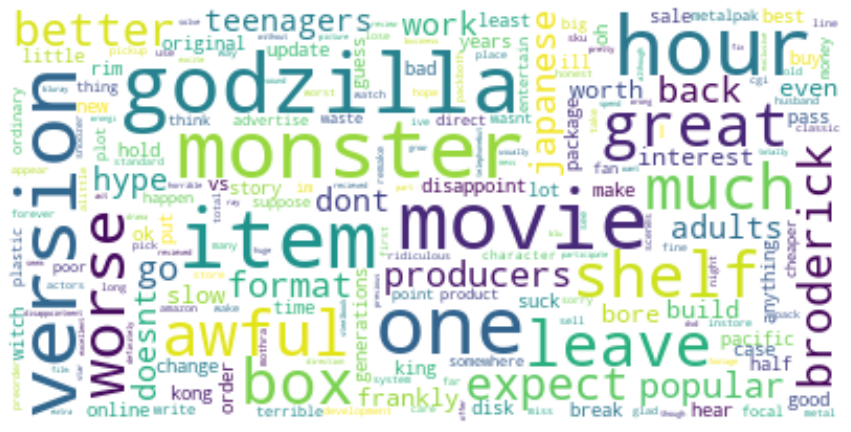

In [64]:
import matplotlib as mpl
import matplotlib.colors as colors
from wordcloud import WordCloud
all_words5 = Bag_Of_Words(ListWords1)
ax = plt.figure(figsize=(15,10))
# Generate a word cloud image
wordcloud = WordCloud(background_color='white',max_font_size=40).generate(' '.join(all_words5.keys()))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
print("All words !!!",len(all_words5))

<AxesSubplot:>

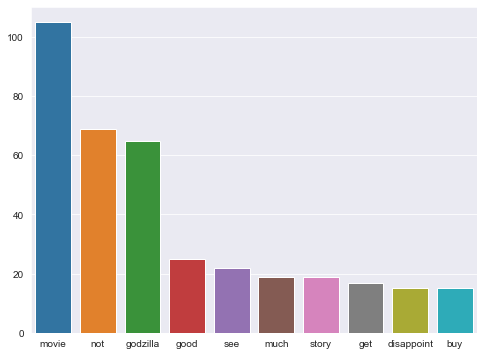

In [65]:
plt.figure(figsize = (8,6))

import seaborn as sns
from sklearn.manifold import TSNE
all_words5 = Bag_Of_Words(ListWords1)
count = []
Words  = []
for w in all_words5.most_common(10):
    count.append(w[1])
    Words.append(w[0])
sns.set_style("darkgrid")
sns.barplot(Words,count)

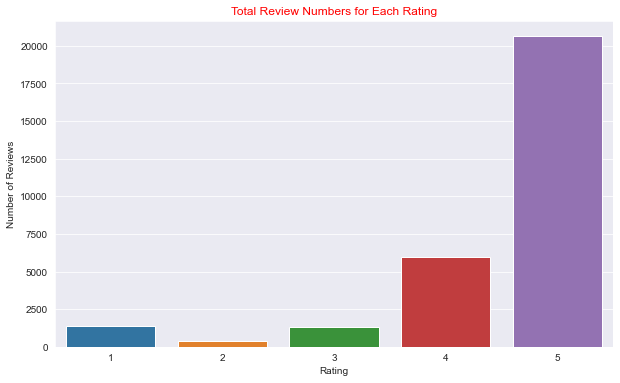

5    20643
4     5988
1     1368
3     1332
2      411
Name: reviews_rating, dtype: int64

In [66]:
plt.figure(figsize = (10,6))
sns.countplot(product_reviews['reviews_rating'])
plt.title('Total Review Numbers for Each Rating', color='r')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
product_reviews['reviews_rating'].value_counts()

<AxesSubplot:ylabel='reviews_rating'>

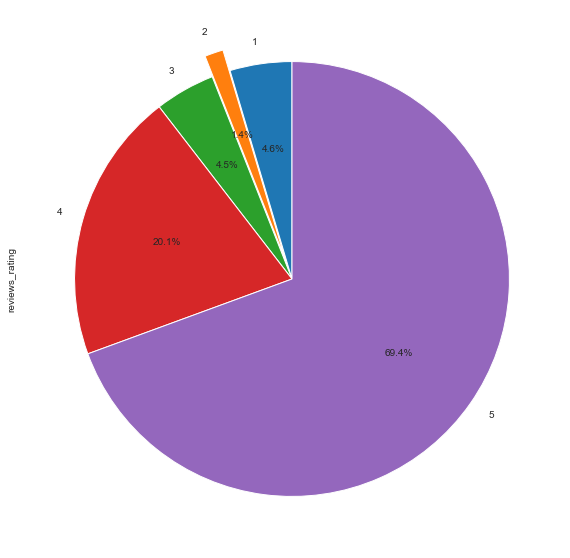

In [67]:
%matplotlib inline
plt.figure(figsize = (15,10))

product_reviews.groupby('reviews_rating').reviews_rating.count()
product_reviews.groupby('reviews_rating').reviews_rating.count().plot(kind='pie',autopct='%1.1f%%',startangle=90,explode=(0,0.1,0,0,0),)

In [68]:
word_count=[]
for s1 in product_reviews.review_text:
    word_count.append(len(str(s1).split()))

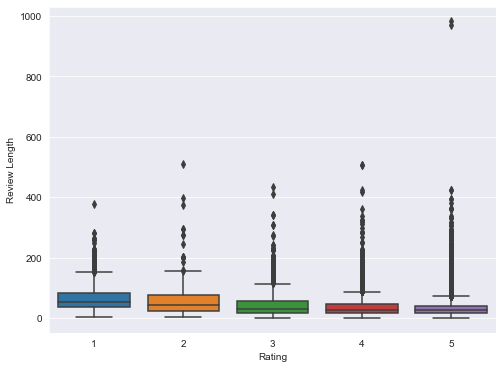

In [69]:
plt.figure(figsize = (8,6))

import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="reviews_rating",y=word_count,data=product_reviews)
plt.xlabel('Rating')
plt.ylabel('Review Length')

plt.show()

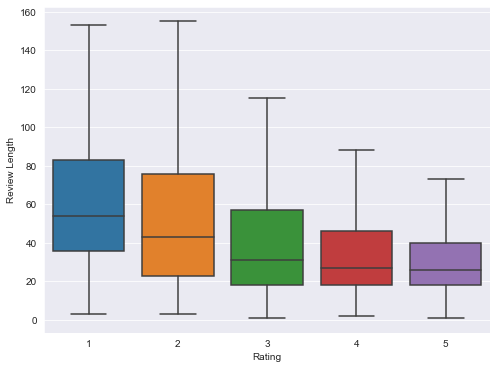

In [70]:
#Since there are outliers in the above boxplot we are not able to clearly visualize.So remove the outliers 
plt.figure(figsize = (8,6))

sns.boxplot(x="reviews_rating",y=word_count,data=product_reviews,showfliers=False)
plt.xlabel('Rating')
plt.ylabel('Review Length')

plt.show()

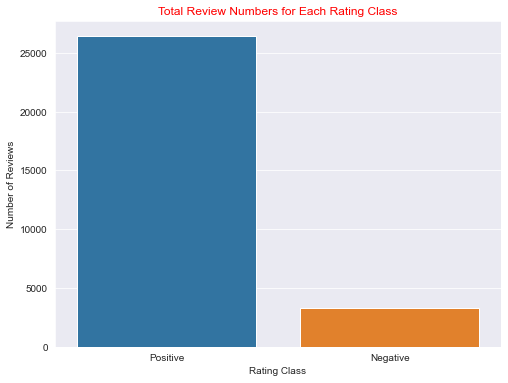

Positive    26407
Negative     3335
Name: user_sentiment, dtype: int64

In [71]:
plt.figure(figsize = (8,6))
sns.countplot(product_reviews['user_sentiment'])
plt.title('Total Review Numbers for Each Rating Class', color='r')
plt.xlabel('Rating Class')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
product_reviews['user_sentiment'].value_counts()

In [72]:
# Create a year column and drop time column
#df['reviewtime'] = pd.to_datetime(df['time'], format = '%Y %m %d')
# Create a "year" column and drop time column

product_reviews['reviews_date'] = pd.to_datetime(product_reviews['reviews_date'],errors='coerce', format='%Y-%m-%d %H:%M:%S')
product_reviews['year'] = pd.to_datetime(product_reviews['reviews_date']).dt.strftime('%Y')
product_reviews = product_reviews.drop('reviews_date', axis = 1)
product_reviews.head(3)

,id,brand,categories,manufacturer,name,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_username,user_sentiment,review_text,clean_text,year
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),True,True,5,joshua,Positive,Just Awesome i love this album. it's very good...,awesome love album good hip hop side current p...,2012
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,False,False,5,dorothy w,Positive,Good Good flavor. This review was collected as...,good good flavor review collect part promotion,2017
2,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,False,False,1,rebecca,Negative,Disappointed I read through the reviews on her...,disappoint read review look buy one couple lub...,2016


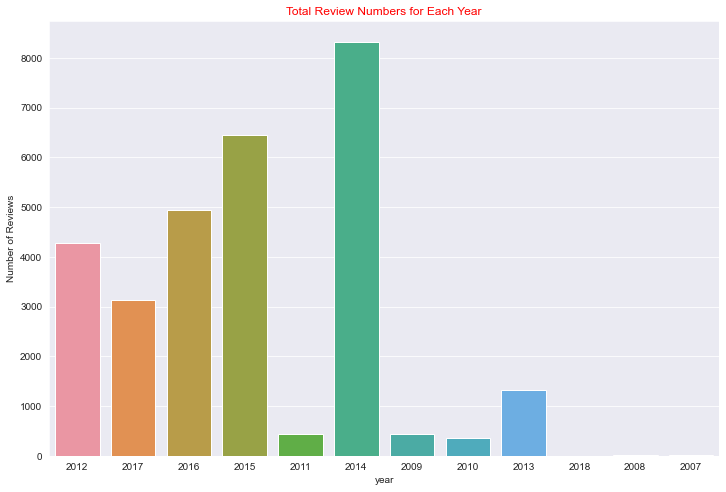

2014    8329
2015    6444
2016    4938
2012    4283
2017    3140
2013    1317
2009     447
2011     440
2010     363
2008      20
2007      10
2018       3
Name: year, dtype: int64

In [73]:
##################################################################
# Total review for every year in the Headphone product
#####################################################################
plt.figure(figsize = (12,8))
sns.countplot(product_reviews['year'])
plt.title('Total Review Numbers for Each Year', color='r')
plt.xlabel('year')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
product_reviews['year'].value_counts()

### 2.2. "customer" Feature

#### Unique Customers

In [74]:
# How many unique customers do we have in the dataset?
print('Number of unique customers: {}'.format(len(product_reviews['reviews_username'].unique())))

Number of unique customers: 24877


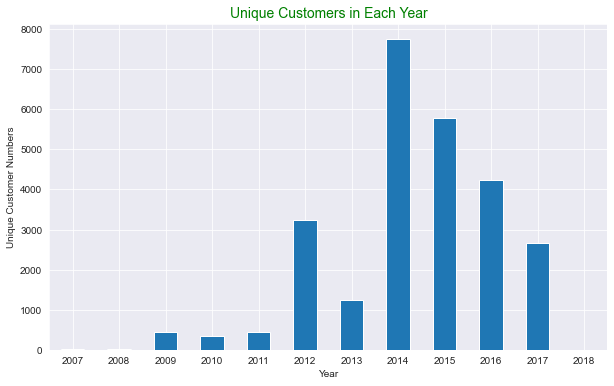

year
2007      10
2008      18
2009     446
2010     351
2011     436
2012    3236
2013    1239
2014    7747
2015    5787
2016    4230
2017    2663
2018       3
Name: reviews_username, dtype: int64


In [75]:
# How many unique customers in each year?
unique_cust = product_reviews.groupby('year')['reviews_username'].nunique()

# Plot unique customer numbers in each year
plt.figure(figsize = (10,6))
unique_cust.plot(kind='bar', rot = 0)
plt.title('Unique Customers in Each Year', color='g', size = 14)
plt.xlabel('Year')
plt.ylabel('Unique Customer Numbers')
plt.show()

# Print unique customer numbers in each year
print(unique_cust)

In [76]:
# unique customers for each "rating class"
a = list(product_reviews.groupby(['user_sentiment'])['reviews_username'].unique())  

# number of customers
a2 = [len(a[0]),len(a[1])] 

# number of reviews for each "rating class"
b = list(product_reviews['user_sentiment'].value_counts())              

uniq_cust_rate = pd.DataFrame({'user_sentiment': ['negative', 'positive'],
                               'number_of_customers': a2,
                               'number_of_reviews': sorted(b)})
print(uniq_cust_rate)

  user_sentiment  number_of_customers  number_of_reviews
0       negative                 2955               3335
1       positive                22241              26407


Comment:
* Here, "customer uniqueness" computed as a metric of "user sentiments"
* The purpose is undertsanding "how much are the reviews made by different customers 
  or how much are they populated by same customers.
* For instance, number of customers of "user sentiments negative " is 699 (nearly 50% of all customers), and they made only 5% (1276) of all reviews, this means 95% of the reviews are given by customers whose sentiments is good.
* And some customers are populating the review rates which may effect the test scores negatively.
* For a detailed work, this small nuances can make difference and it may be requried to handle them.

### 2.3. "product" Feature

In [77]:
# Print number of unique products in the dataset
print('Number of unique products: {}'.format(len(product_reviews['id'].unique())))

Number of unique products: 269


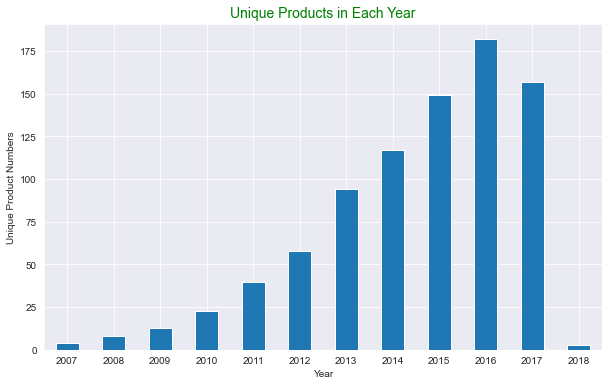

year
2007      4
2008      8
2009     13
2010     23
2011     40
2012     58
2013     94
2014    117
2015    149
2016    182
2017    157
2018      3
Name: id, dtype: int64


In [78]:
# How many unique products in each year?
unique_prod = product_reviews.groupby('year')['id'].nunique()

# Plot unique product numbers in each year
plt.figure(figsize = (10,6))
unique_prod.plot(kind='bar', rot =0)
plt.title('Unique Products in Each Year', color = 'g', size = 14)
plt.xlabel('Year')
plt.ylabel('Unique Product Numbers')
plt.show()

# Print unique product numbers in each year
print(unique_prod)

Text(0, 0.5, 'Number of Reviews')

<Figure size 1080x576 with 0 Axes>

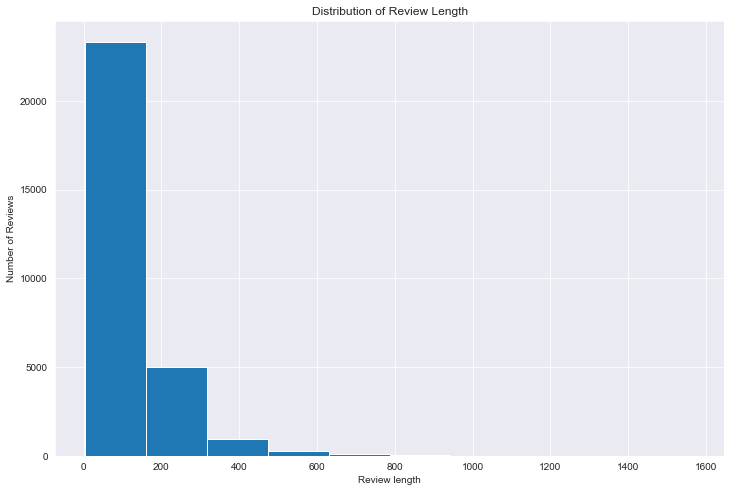

In [79]:
##########################################
## PLOT DISTRIBUTION OF REVIEW LENGTH   
##########################################
plt.figure(figsize = (15,8))

review_length = product_reviews["clean_text"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
review_length.loc[review_length < 2000].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length')
plt.ylabel('Number of Reviews')

In [80]:
# Let's see how the rating classes change for each year in a table and graph.
# Create a dataframe which shows the relationship between review numbers and rating classes for each year

product_reviews['rating_class_num'] = product_reviews['user_sentiment'].map({'Positive': 1, 'Negative': 0})
    
feature = product_reviews.groupby('year').agg({'rating_class_num':['size', 'sum', 'mean']})
feature.columns = [' '.join(col).strip() for col in feature.columns.values]
feature = feature.reset_index()
feature['rating_class_num mean'] = feature['rating_class_num mean']*100
feature.columns = ['Year', 'Total Reviews', 'Relevant Rating Number', 
                       '% of Relevant Rating Number in This Year'] 
feature['% of Relevant Rating in the Total'] = (feature['Relevant Rating Number'] / 22425)*100
        
feature

,Year,Total Reviews,Relevant Rating Number,% of Relevant Rating Number in This Year,% of Relevant Rating in the Total
0,2007,10,9,90.000000,0.040134
1,2008,20,19,95.000000,0.084727
2,2009,447,428,95.749441,1.908584
3,2010,363,342,94.214876,1.525084
4,2011,440,400,90.909091,1.783724
5,2012,4283,3933,91.828158,17.538462
6,2013,1317,1122,85.193622,5.003344
7,2014,8329,7559,90.755193,33.707915
8,2015,6444,5567,86.390441,24.824972
9,2016,4938,4260,86.269745,18.996656


<Figure size 864x576 with 0 Axes>

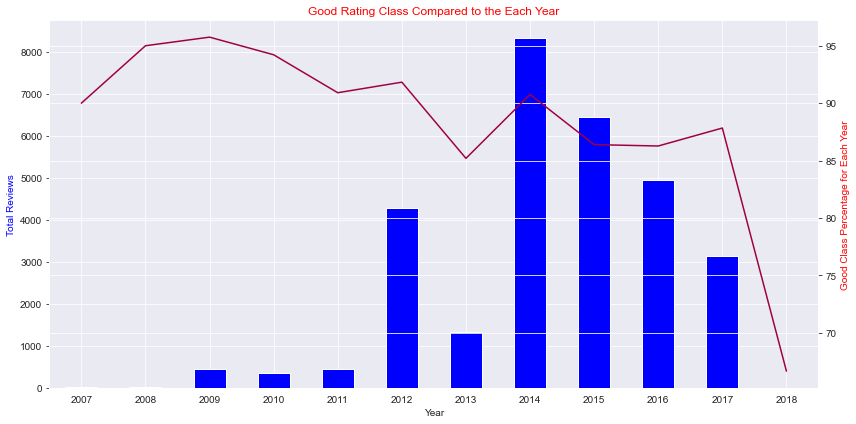

In [81]:
##################################################################
# Create a graph for each rating class to compare within the years
##################################################################

product_reviews['rating_class_num'] = product_reviews['user_sentiment'].map({'Positive': 1, 'Negative': 0})

feature = product_reviews.groupby('year').agg({'rating_class_num':['size', 'sum', 'mean']})
feature.columns = [' '.join(col).strip() for col in feature.columns.values]
feature = feature.reset_index()
feature['rating_class_num mean'] = feature['rating_class_num mean']*100
feature.columns = ['Year', 'Total Reviews', 'Relevant Rating Number', 
                    '% of Relevant Rating Number in This Year'] 
plt.figure(figsize = (12,8))
fig0, ax1 = plt.subplots(figsize = (12,6))
ax2 = ax1.twinx()
feature.set_index(feature['Year'], drop=True, inplace=True)
feature["Total Reviews"].plot(kind = 'bar', stacked = True, ax = ax1, colormap = 'winter', rot=0)
feature['% of Relevant Rating Number in This Year'].plot(use_index = False, 
                                                         kind = 'line', ax = ax2, colormap='Spectral')   

plt.title('Good Rating Class Compared to the Each Year', color='r')
ax1.set_xlabel('Year')
ax1.yaxis.label.set_color('blue')
ax1.set_ylabel("Total Reviews")
ax2.set_ylabel("Good Class Percentage for Each Year")
ax2.yaxis.label.set_color('red')
plt.tight_layout()
plt.show()

In [82]:
# Function for creating a column token
def token (text):
    token = [w for w in nltk.word_tokenize(text)]
    return token

# To create token feature
product_reviews['token'] = product_reviews['clean_text'].apply(token)

In [83]:
# Function for creating a column to see the length of the review text
def length(text):
    length = len([w for w in nltk.word_tokenize(text)])
    return length

# Apply length function to create review length feature
product_reviews['review_length'] = product_reviews['review_text'].apply(length)
product_reviews.head(3)

,id,brand,categories,manufacturer,name,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_username,user_sentiment,review_text,clean_text,year,rating_class_num,token,review_length
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),True,True,5,joshua,Positive,Just Awesome i love this album. it's very good...,awesome love album good hip hop side current p...,2012,1,"[awesome, love, album, good, hip, hop, side, c...",51
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,False,False,5,dorothy w,Positive,Good Good flavor. This review was collected as...,good good flavor review collect part promotion,2017,1,"[good, good, flavor, review, collect, part, pr...",14
2,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,False,False,1,rebecca,Negative,Disappointed I read through the reviews on her...,disappoint read review look buy one couple lub...,2016,0,"[disappoint, read, review, look, buy, one, cou...",144


In [84]:
# Create review length bin feature
product_reviews['review_length_bin'] = pd.cut(product_reviews['review_length'], np.arange(0,4800,100))
product_reviews.head()

,id,brand,categories,manufacturer,name,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_username,user_sentiment,review_text,clean_text,year,rating_class_num,token,review_length,review_length_bin
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),True,True,5,joshua,Positive,Just Awesome i love this album. it's very good...,awesome love album good hip hop side current p...,2012,1,"[awesome, love, album, good, hip, hop, side, c...",51,"(0, 100]"
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,False,False,5,dorothy w,Positive,Good Good flavor. This review was collected as...,good good flavor review collect part promotion,2017,1,"[good, good, flavor, review, collect, part, pr...",14,"(0, 100]"
2,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,False,False,1,rebecca,Negative,Disappointed I read through the reviews on her...,disappoint read review look buy one couple lub...,2016,0,"[disappoint, read, review, look, buy, one, cou...",144,"(100, 200]"
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,False,False,1,walker557,Negative,Irritation My husband bought this gel for us. ...,irritation husband buy gel us gel cause irrita...,2016,0,"[irritation, husband, buy, gel, us, gel, cause...",30,"(0, 100]"
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,False,False,1,samantha,Negative,Not worth it My boyfriend and I bought this to...,not worth boyfriend buy spice things bedroom h...,2016,0,"[not, worth, boyfriend, buy, spice, things, be...",58,"(0, 100]"


In [85]:
# Good rating percentages for each length bin with 50's
per_pos_length = product_reviews.groupby(['review_length_bin'])['rating_class_num'].mean()
product_reviews['review_length_bin'] = product_reviews.review_length_bin.astype(str)
per_pos_length = per_pos_length*100
per_pos_length

review_length_bin
(0, 100]         88.646273
(100, 200]       90.387183
(200, 300]       94.270833
(300, 400]       93.877551
(400, 500]      100.000000
(500, 600]      100.000000
(600, 700]             NaN
(700, 800]             NaN
(800, 900]             NaN
(900, 1000]            NaN
(1000, 1100]    100.000000
(1100, 1200]    100.000000
(1200, 1300]           NaN
(1300, 1400]           NaN
(1400, 1500]           NaN
(1500, 1600]           NaN
(1600, 1700]           NaN
(1700, 1800]           NaN
(1800, 1900]           NaN
(1900, 2000]           NaN
(2000, 2100]           NaN
(2100, 2200]           NaN
(2200, 2300]           NaN
(2300, 2400]           NaN
(2400, 2500]           NaN
(2500, 2600]           NaN
(2600, 2700]           NaN
(2700, 2800]           NaN
(2800, 2900]           NaN
(2900, 3000]           NaN
(3000, 3100]           NaN
(3100, 3200]           NaN
(3200, 3300]           NaN
(3300, 3400]           NaN
(3400, 3500]           NaN
(3500, 3600]           NaN
(3600, 370

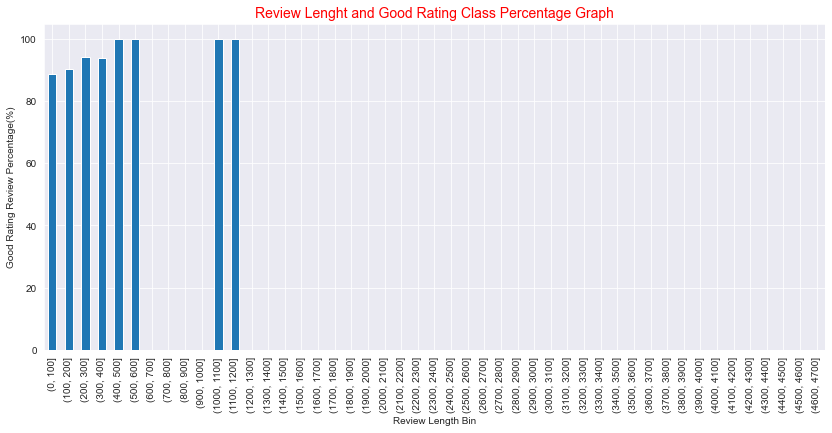

In [86]:
# Plot the graph for good rating class percentage and review length bin
plt.figure(figsize = (14,6))
per_pos_length.plot(kind='bar')
plt.title('Review Lenght and Good Rating Class Percentage Graph', color = 'r', size = 14)
plt.xlabel('Review Length Bin')
plt.ylabel('Good Rating Review Percentage(%)')
plt.show()

#### Correlation Between Numeric Variables

<AxesSubplot:>

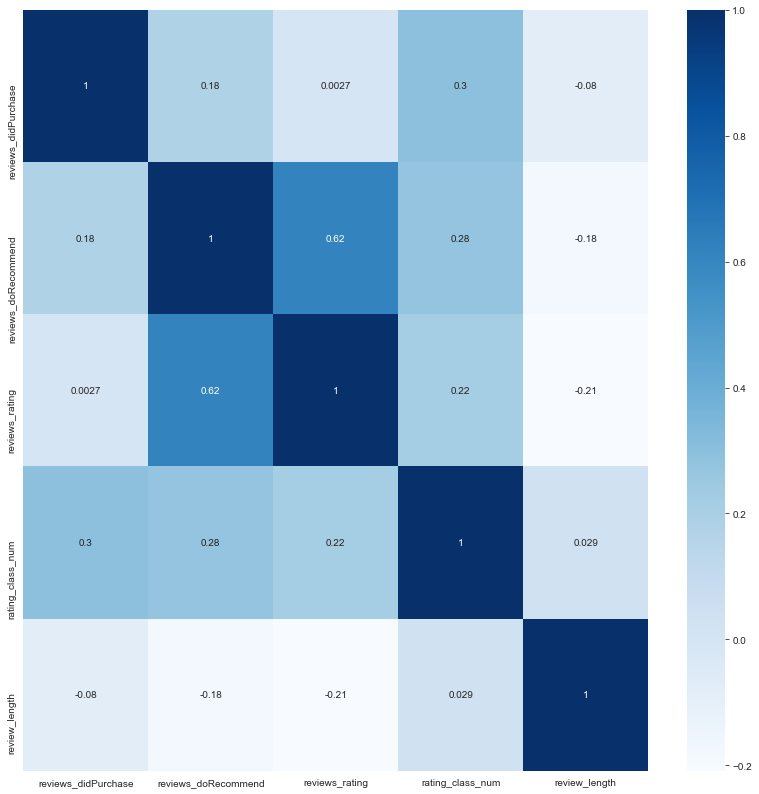

In [88]:
# Plotting correlation matrix between numeric variables

plt.figure(figsize = (14,14))
sns.heatmap(product_reviews.corr(method="pearson"), cmap='Blues', annot = True)

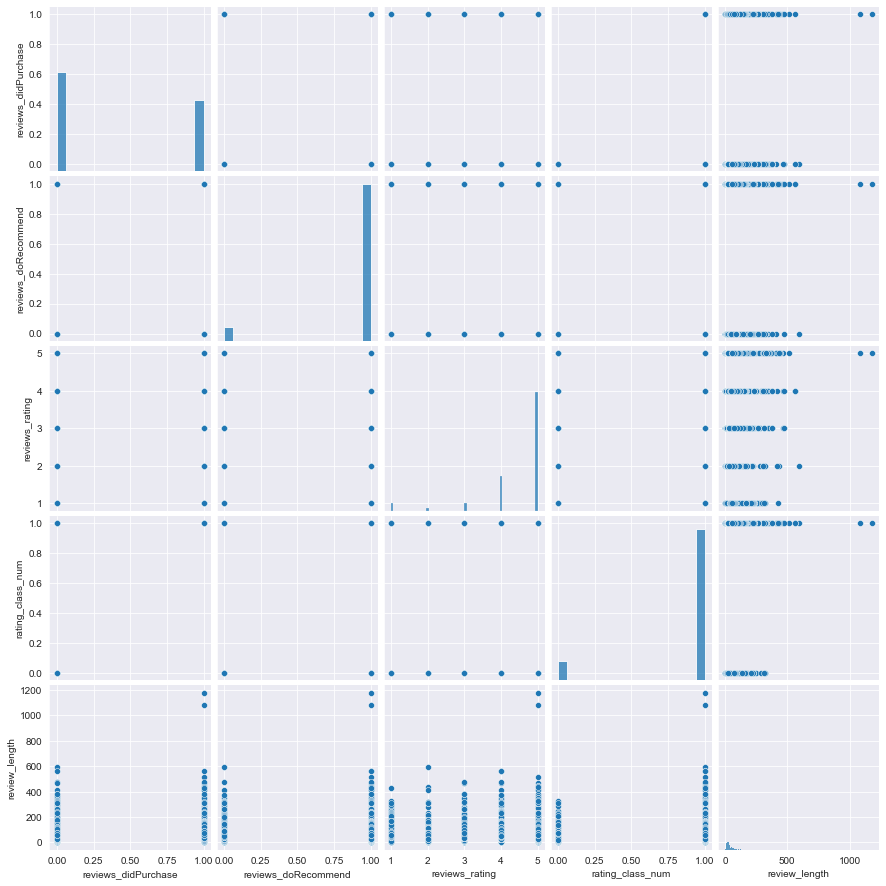

In [89]:
sns.pairplot(product_reviews)

### 2.7. "clean_text" Feature

In [90]:
# Create a new data frame with clean text and rating class number
df5 = product_reviews[["clean_text", "rating_class_num"]].reset_index()
df5.head(10)

,index,clean_text,rating_class_num
0,0,awesome love album good hip hop side current p...,1
1,1,good good flavor review collect part promotion,1
2,2,disappoint read review look buy one couple lub...,0
3,3,irritation husband buy gel us gel cause irrita...,0
4,4,not worth boyfriend buy spice things bedroom h...,0
5,5,disappoint buy earlier today excite check base...,0
6,6,not happy buy product husband try not impress ...,0
7,7,disappoint husband buy extra fun werevboth ext...,0
8,8,dont buy get surprise husband nothing special ...,1
9,9,pretty dissapoitned try husband felt no differ...,0


In [91]:
# Initialize the countervectorizer
countVec = CountVectorizer(ngram_range=(1, 2),binary=True)

In [92]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29742 entries, 0 to 29741
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             29742 non-null  int64 
 1   clean_text        29742 non-null  object
 2   rating_class_num  29742 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 697.2+ KB


In [93]:
# Fit the 'clean_text' to countvectorizer
countVec.fit(df5["clean_text"])

CountVectorizer(binary=True, ngram_range=(1, 2))

In [94]:
# Transform the matriz
transformed_matrix = countVec.transform(df5["clean_text"])

In [95]:
# Convert matrix to array
transformed_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [96]:
# Extracting the feature names
names = countVec.get_feature_names()

In [97]:
# Adding a 'rating' column from previous dataframe's rating value
df6 = pd.DataFrame(transformed_matrix.toarray(), columns=names)
df6['rating'] = df5['rating_class_num']

In [ ]:
df6['rating'].head()

In [ ]:
# Create lists for forming a dataframe summary
feature_names = []
avg_ratings = [] 
rating_counts = []
for name in names:
    if name != 'rating':    
        avg_rating = df6[df6[name]== 1]['rating'].mean()
        rating_count = df6[df6[name]== 1]['rating'].count()
        feature_names.append(name)
        avg_ratings.append(avg_rating)
        rating_counts.append(rating_count)  
    else:
        pass

In [ ]:
##### Create a new dataframe from words, average ratings, and rating counts
df_summary = pd.DataFrame({'feature_name':feature_names, 'avg_rating': avg_ratings, 'rating_count':rating_counts})



In [ ]:
# Let's see the new dataframe
df_summary

#### Good rating words

In [ ]:
# Words that are commonly used in the reviews which have good ratings
df_good = df_summary.query("rating_count > 20").sort_values(by='avg_rating', ascending=False)[4:50]
df_good.head(50)

In [ ]:
wc_good = dict(zip(df_good['feature_name'].tolist(), df_good['avg_rating'].tolist()))

In [ ]:

# Generate a word cloud image
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate_from_frequencies(wc_good)
 
# plot the WordCloud image                       
plt.figure(figsize = (20, 20), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Fixing the rating count value is above 100, the most common 50 words which belong to good rating class are shown in the table above. Each of these words define which products what kind of good impression have on the customers. 

#### Bad rating words

In [ ]:
# Words that are commonly used in the reviews which have bad ratings
df_bad = df_summary.query("rating_count > 10").sort_values(by= 'avg_rating', ascending=True)[:12]

In [ ]:
df_bad.sort_values(by=['avg_rating'],ascending=False,inplace=True)
df_bad

In [ ]:
wc_bad = dict(zip(df_bad['feature_name'].tolist(), df_bad['avg_rating'].tolist()))

In [ ]:
# Generate a word cloud image

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate_from_frequencies(wc_bad)
 
# plot the WordCloud image                       
plt.figure(figsize = (20, 20), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
df.info()

In [ ]:
df4.to_csv('data/Reduced_Cleaned_Reviews.csv', sep=',', encoding='utf-8', index = False)

